In [15]:
import csv
from bs4 import BeautifulSoup

def scrape_winners(file_path):
    try:
        with open(file_path, newline='', encoding='utf-8') as csvfile:
            reader = csv.DictReader(csvfile)
            winners = []
            for row in reader:
                year = row['Year']
                movie_title = row['Movie Title']
                director = row['Director']
                cast = row['Cast']
                winners.append([year, movie_title, director, cast])
            return winners
    except FileNotFoundError:
        print(f"Error: File not found at path {file_path}")
        return []

def main():
    file_paths = [
        "C:/Users/frivo/Documents/csv coding project/mar_film_affinity_winners.csv",
        "C:/Users/frivo/Documents/csv coding project/shanghai_film_affinity_winners.csv",
        "C:/Users/frivo/Documents/csv coding project/stiges_film_affinity_winners.csv",
        "C:/Users/frivo/Documents/csv coding project/tokyo_film_affinity_winners.csv",
        "C:/Users/frivo/Documents/csv coding project/toronto_film_affinity_winners.csv",
        "C:/Users/frivo/Documents/csv coding project/venice_film_affinity_winners.csv"
    ]

    with open('academy_awards_film_affinity_winners.csv', 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Category', 'Year', 'Movie Title', 'Director', 'Cast'])
        for file_path in file_paths:
            category = file_path.split('/')[-1].split('.')[0]  # Extract category from file path
            winners = scrape_winners(file_path)
            for winner in winners:
                writer.writerow([category.capitalize().replace("_", " "), *winner])

if __name__ == "__main__":
    main()


Error: File not found at path C:/Users/frivo/Documents/csv coding project/stiges_film_affinity_winners.csv


In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from stargazer.stargazer import Stargazer

df = pd.read_csv("C:/Users/frivo/Downloads/concatenated_data.csv")

df['more_than_one_category'] = df['NumCategories'].apply(lambda x: 1 if x > 1 else 0)

m1 = smf.ols('NumCategories ~ Camera ', df).fit()
m2 = smf.ols('NumCategories ~ Camera + camera_brand', df).fit()
m3 = smf.ols('NumCategories ~ Camera + camera_brand + Year', df).fit()

covariates_m1 = set(m1.model.exog_names)
covariates_m2 = set(m2.model.exog_names)
covariates_m3 = set(m3.model.exog_names)

covariate_order = list(covariates_m1.intersection(covariates_m2,covariates_m3)) + ['Intercept']

s1 = Stargazer([m1, m2, m3])
s1.covariate_order(covariate_order)
s1

In [97]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from stargazer.stargazer import Stargazer

df = pd.read_csv("C:/Users/frivo/Downloads/grouped_merged_combined_festival_test.csv")

df['more_than_one_category'] = df['NumCategories'].apply(lambda x: 1 if x > 1 else 0)

n1 = smf.ols('more_than_one_category ~ camera', df).fit()
n2 = smf.ols('more_than_one_category ~ camera + camera_brand', df).fit()
n3 = smf.ols('more_than_one_category ~ camera + camera_brand + Year', df).fit()

covariates_n1 = set(n1.model.exog_names)
covariates_n2 = set(n2.model.exog_names)
covariates_n3 = set(n3.model.exog_names)
# Construct the covariate order for each model
covariate_order = list(covariates_n1.intersection(covariates_n2,covariates_n3)) + ['Intercept']

s2 = Stargazer([n1, n2, n3])
s2.covariate_order(covariate_order)
s2

In [9]:
models = []
for prestige_level in ['Low', 'Medium', 'High']:
    subset_df = df[df['Prestige'] == prestige_level]
    model = smf.ols('NumCategories ~  C(Camera) + C(camera_brand)', data=subset_df).fit(method='pinv')  # Use method='pinv'
    models.append(model)

s2 = Stargazer(models)
s2.title('Linear Regression Results by Prestige Level')
s2.custom_columns(['Low', 'Medium', 'High'], [1, 1, 1])
s2

In [7]:
models = []
for prestige_level in ['Low', 'Medium', 'High']:
    subset_df = df[df['Prestige'] == prestige_level]
    model = smf.ols('more_than_one_category ~ Camera + camera_brand', data=subset_df).fit(method='pinv')  # Use method='pinv'
    models.append(model)

s3 = Stargazer(models)
s3.title('Linear Regression Results by Prestige Level')
s3.custom_columns(['Low', 'Medium', 'High'], [1, 1, 1])
s3

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from stargazer.stargazer import Stargazer

pf = pd.read_csv("C:/Users/frivo/Downloads/master_award_winners_with_camera_final.csv")

pf['more_than_one_category'] = pf['Category_Count'].apply(lambda x: 1 if x > 1 else 0)


e1 = smf.ols('Category_Count ~ Camera', pf).fit()
e2 = smf.ols('Category_Count ~ Camera + camera_brand', pf).fit()
e3 = smf.ols('Category_Count ~ Camera + camera_brand + Year', pf).fit()

covariates_e1 = set(e1.model.exog_names)
covariates_e2 = set(e2.model.exog_names)
covariates_e3 = set(e3.model.exog_names)

covariate_order = list(covariates_e1.intersection(covariates_e2,covariates_e3)) + ['Intercept']

e = Stargazer([e1, e2, e3])
e.covariate_order(covariate_order)
e

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from stargazer.stargazer import Stargazer

pf = pd.read_csv("C:/Users/frivo/Downloads/master_award_winners_with_camera_final.csv")

pf['more_than_one_category'] = pf['Category_Count'].apply(lambda x: 1 if x > 1 else 0)


d1 = smf.ols('more_than_one_category ~ Camera', pf).fit()
d2 = smf.ols('more_than_one_category ~ Camera + camera_brand', pf).fit()
d3 = smf.ols('more_than_one_category ~ Camera + camera_brand + Year', pf).fit()

covariates_d1 = set(d1.model.exog_names)
covariates_d2 = set(d2.model.exog_names)
covariates_d3 = set(d3.model.exog_names)

covariate_order = list(covariates_d1.intersection(covariates_d2,covariates_d3)) + ['Intercept']

d = Stargazer([d1, d2, d3])
d.covariate_order(covariate_order)
d

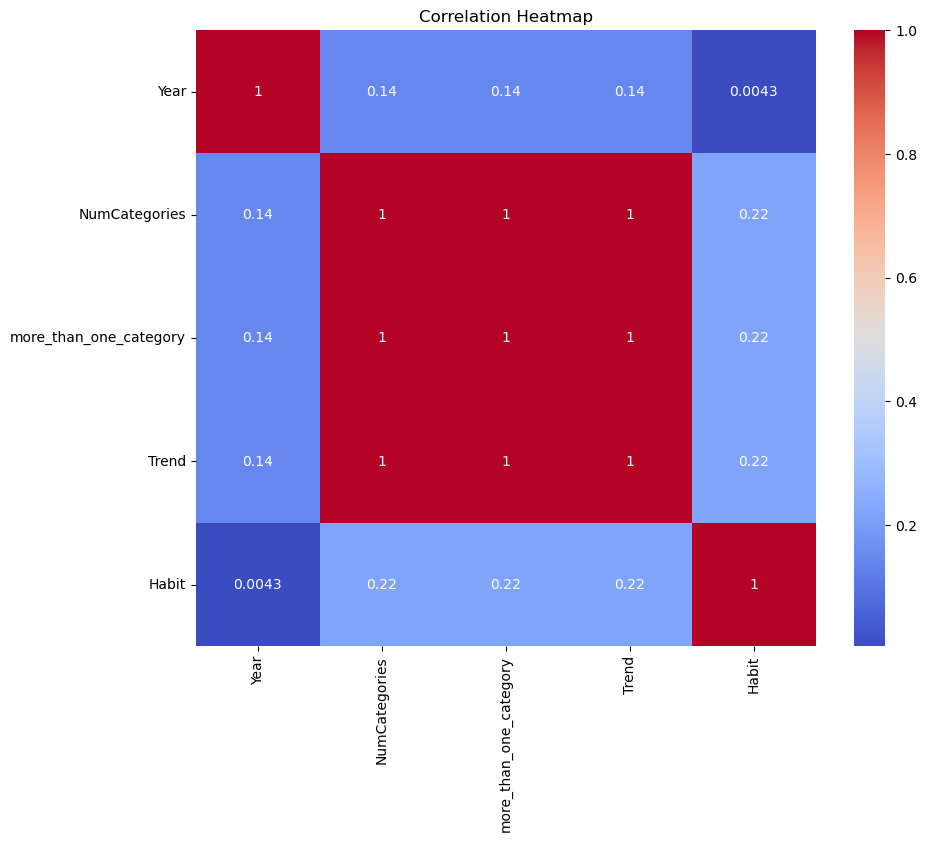

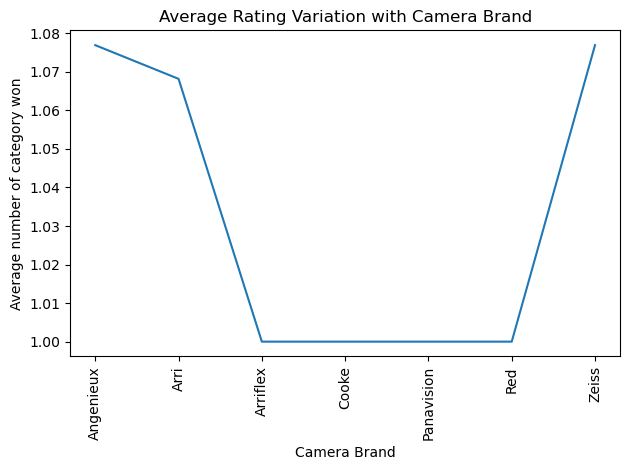

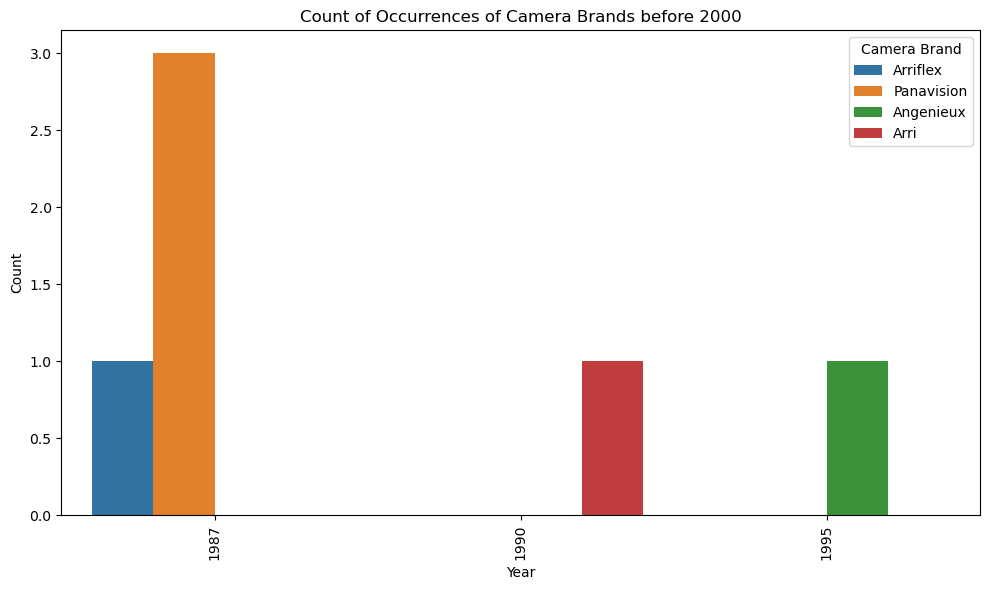

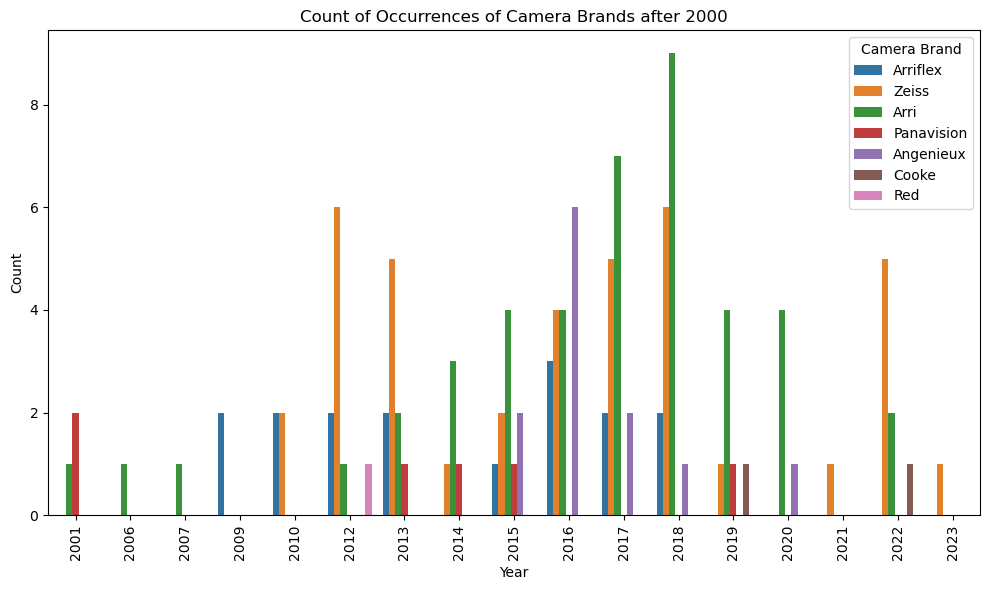

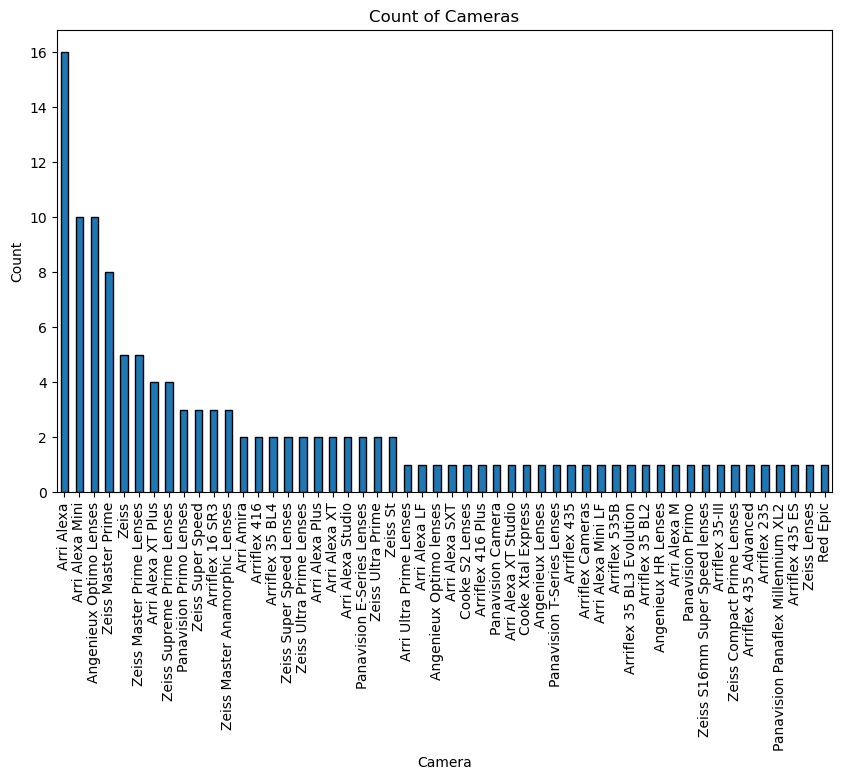

<Axes: ylabel='Density'>

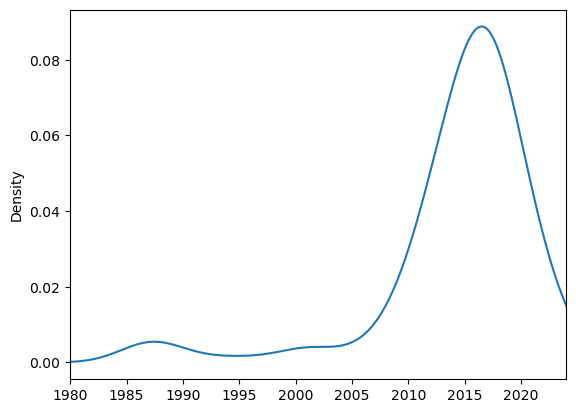

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df['Trend'] = df.groupby(['genres', 'Year','camera'])['NumCategories'].transform('mean')

df['Habit'] = df.groupby('camera_brand')['NumCategories'].shift(1)

df.dropna(inplace=True)


numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


plt.figure()
ax = sns.lineplot(x='camera_brand', y='NumCategories', data=df.groupby('camera_brand')['NumCategories'].mean().reset_index())
plt.title('Average Rating Variation with Camera Brand')
plt.xlabel('Camera Brand')
plt.ylabel('Average number of category won')

# Rotate x-axis labels vertically with minimum space
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

plt.show()

df_before_2000 = df[df['Year'] < 2000]
df_after_2000 = df[df['Year'] >= 2000]


plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df_before_2000, hue='camera_brand')
plt.title('Count of Occurrences of Camera Brands before 2000')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title='Camera Brand')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df_after_2000, hue='camera_brand')
plt.title('Count of Occurrences of Camera Brands after 2000')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title='Camera Brand')
plt.show()

plt.figure(figsize=(10, 6))
df['camera'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Count of Cameras')
plt.xlabel('Camera')
plt.ylabel('Count')
plt.show()


df['Year'].plot(kind='density', xlim=(1980, 2024))

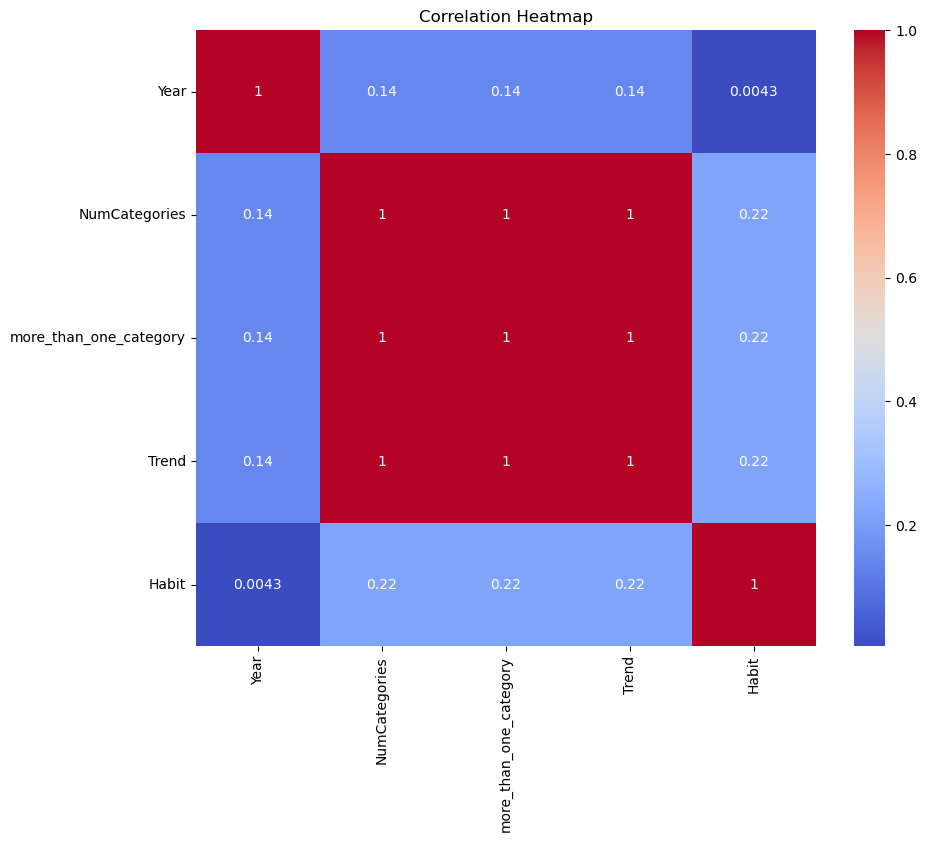

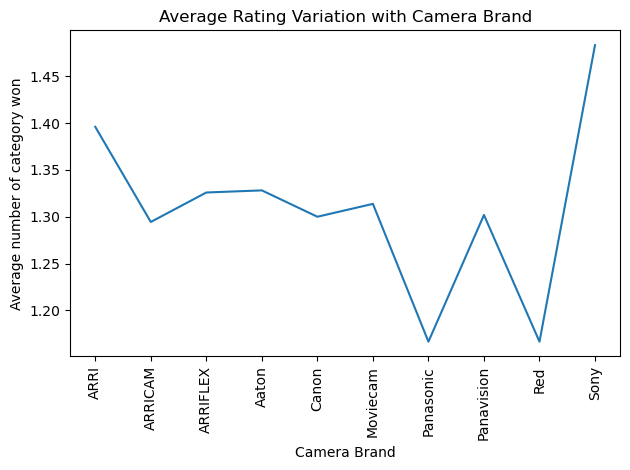

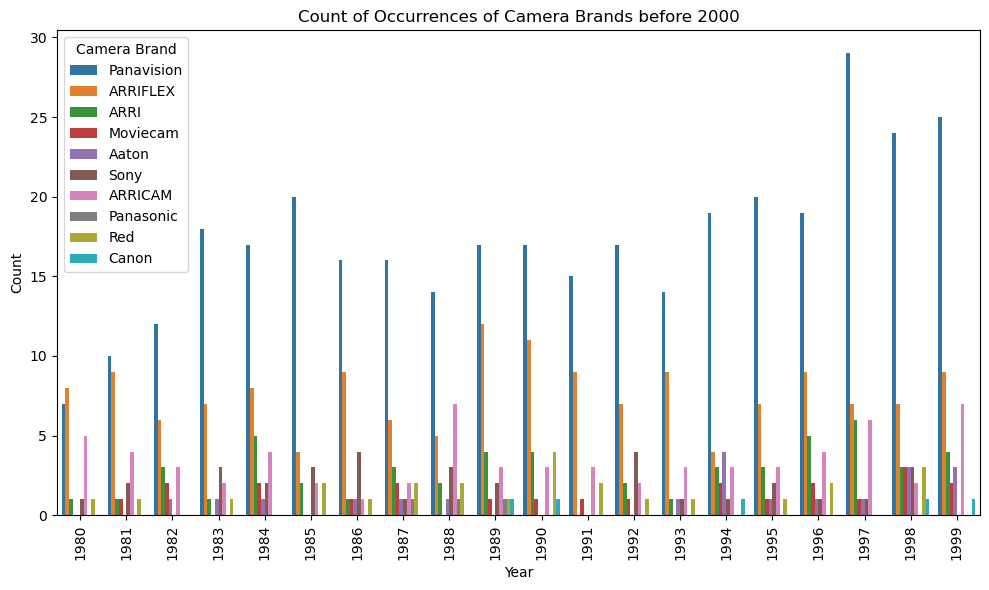

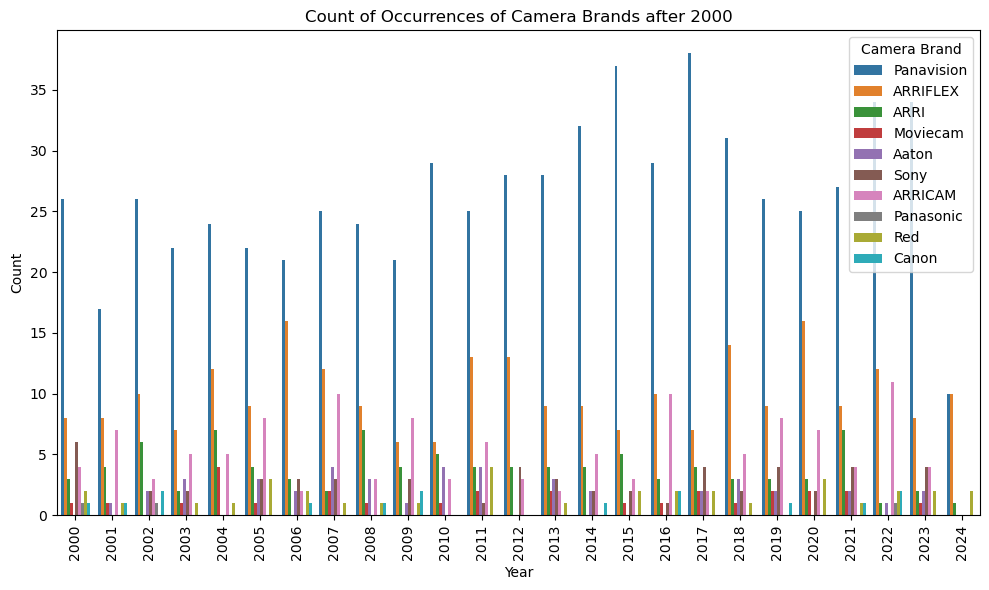

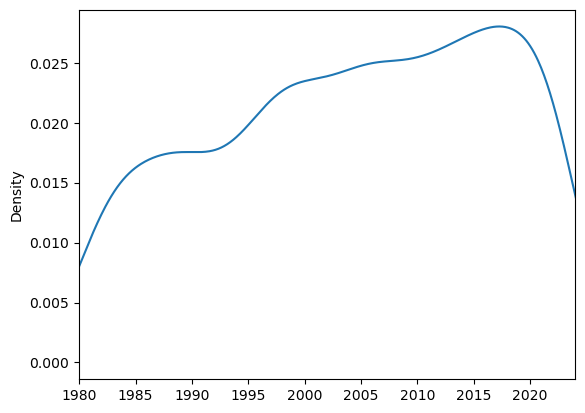

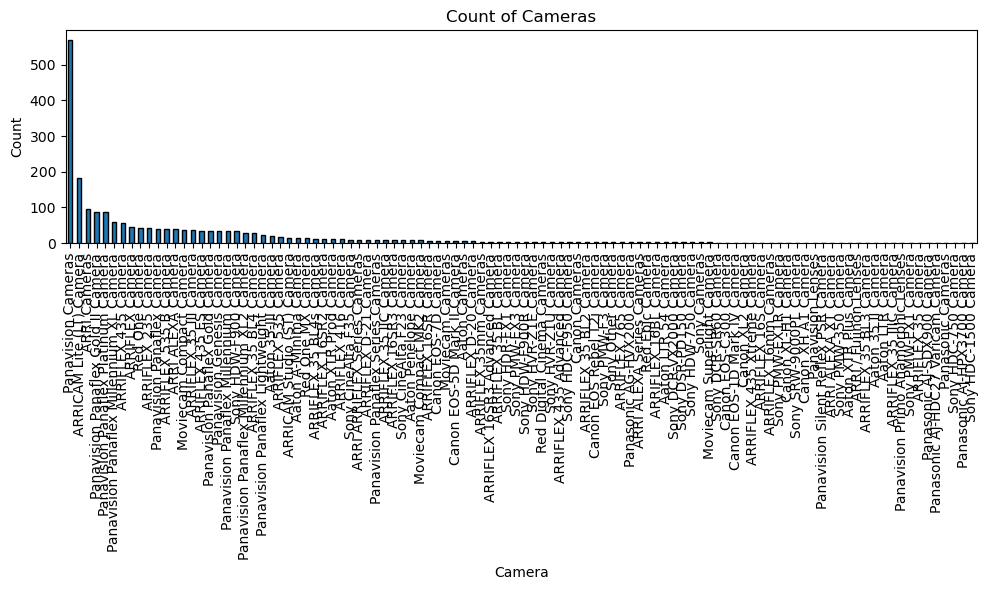

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


pf['Trend'] = pf.groupby(['Year','Camera', 'Festival'])['Category_Count'].transform('mean')

pf['Habit'] = pf.groupby('camera_brand')['Category_Count'].shift(1)

pf.dropna(inplace=True)


numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')



plt.figure()
bx = sns.lineplot(x='camera_brand', y='Category_Count', data=pf.groupby('camera_brand')['Category_Count'].mean().reset_index())
plt.title('Average Rating Variation with Camera Brand')
plt.xlabel('Camera Brand')
plt.ylabel('Average number of category won')

# Rotate x-axis labels vertically with minimum space
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

pf_before_2000 = pf[pf['Year'] < 2000]
pf_after_2000 = pf[pf['Year'] >= 2000]


plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=pf_before_2000, hue='camera_brand')
plt.title('Count of Occurrences of Camera Brands before 2000')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title='Camera Brand')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=pf_after_2000, hue='camera_brand')
plt.title('Count of Occurrences of Camera Brands after 2000')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title='Camera Brand')
plt.show()

pf['Year'].plot(kind='density', xlim=(1980, 2024))

plt.figure(figsize=(10, 6))
pf['Camera'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Count of Cameras')
plt.xlabel('Camera')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



In [10]:
import statsmodels.formula.api as smf
import pandas as pd
df=pd.read_csv(r"C:\Users\frivo\Downloads\master_award_winners_with_camera_final.csv")
m1=smf.ols("Category_Count ~ Camera", df).fit()
m2=smf.ols("Category_Count ~ Camera * Year", df).fit()
m3=smf.ols("Category_Count ~ camera_brand ", df).fit()
print(m1.summary())
print(m2.summary())
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:         Category_Count   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.255
Date:                Sun, 14 Apr 2024   Prob (F-statistic):             0.0144
Time:                        23:23:40   Log-Likelihood:                -2671.0
No. Observations:                2553   AIC:                             5708.
Df Residuals:                    2370   BIC:                             6778.
Df Model:                         182                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [11]:
import statsmodels.formula.api as smf
import pandas as pd
df=pd.read_csv(r"C:\Users\frivo\Downloads\master_award_winners_with_camera_final_with_usage_result.csv")
n1=smf.ols("NumCategories ~ Camera", df).fit()
n2=smf.ols("NumCategories ~ camera_brand", df).fit()
n3=smf.ols("NumCategories ~ camera_brand + Camera_Usage_More_Than_Once + Category_Count +Year", df).fit()
print(n1.summary())
print(n2.summary())
print(n3.summary())

                            OLS Regression Results                            
Dep. Variable:          NumCategories   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1.364
Date:                Sun, 14 Apr 2024   Prob (F-statistic):            0.00129
Time:                        23:23:43   Log-Likelihood:                -5578.7
No. Observations:                2553   AIC:                         1.152e+04
Df Residuals:                    2370   BIC:                         1.259e+04
Df Model:                         182                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [1]:
import statsmodels.formula.api as smf
import pandas as pd
pf=pd.read_csv(r"C:\Users\frivo\Downloads\concatenated_data.csv")
pf['Category_Count'] = pf['NumCategories'].apply(lambda x: 1 if x > 1 else 0)
m1=smf.ols("Category_Count ~ Camera", pf).fit()
m2=smf.ols("Category_Count ~ Camera * Year", pf).fit()
m3=smf.ols("Category_Count ~ camera_brand ", pf).fit()
print(m1.summary())
print(m2.summary())
print(m3.summary())

C:\Users\frivo\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


No match found for: thebestofallworlds with year 2017
No match found for: theparticle with year 2013
No match found for: joanna with year 2011
No match found for: sneakers with year 2011
No match found for: nothingpersonal with year 2007
No match found for: lucía with year 1969
No match found for: ambulance with year 2017
No match found for: anarchyinzirmunai with year 2011
No match found for: nan with year 2011
No match found for: trash with year 2014
No match found for: tir with year 2013
No match found for: chinesetake-away with year 2011
No match found for: killmeplease with year 2010
No match found for: brotherhood with year 2009
No match found for: juno with year 2007
No match found for: izobrajayazhertvy with year 2006


KeyboardInterrupt: 

In [12]:
import statsmodels.formula.api as smf
import pandas as pd
pf=pd.read_csv(r"C:\Users\frivo\Downloads\concatenated_data.csv")
pf['Category_Count'] = pf['NumCategories'].apply(lambda x: 1 if x > 1 else 0)
n1=smf.ols("NumCategories ~ Camera", pf).fit()
n2=smf.ols("NumCategories ~ camera_brand ", pf).fit()
print(n1.summary())
print(n2.summary())

                            OLS Regression Results                            
Dep. Variable:          NumCategories   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.9375
Date:                Sun, 14 Apr 2024   Prob (F-statistic):              0.740
Time:                        23:24:41   Log-Likelihood:                -471.55
No. Observations:                 852   AIC:                             1629.
Df Residuals:                     509   BIC:                             3258.
Df Model:                         342                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------